# scikit-FIBERS Example Code

## Installation and Imports 
How to setup and use scikit-FIBERS

In [1]:
# !pip uninstall scikit-fibers --yes 

In [2]:
import os
import pickle
import pandas as pd
from skfibers import FIBERS
from lifelines import CoxPHFitter
from skfibers.experiments.datagen import create_data_simulation_bin
from skfibers.experiments.datagen_evolvable_threshold import create_data_simulation_bin_evolve
from sklearn.metrics import classification_report

/Users/harshbandhey/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Creating Simulation Data by provided functionality

In [3]:
data = create_data_simulation_bin_evolve(number_of_instances=1000, number_of_features=75, number_of_features_in_bin=10,
                                  no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.0,
                                  class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2),
                                  censoring_frequency=0.5, random_seed=42, negative=False, threshold=2)
if not os.path.exists('run_history/'):
    os.makedirs('run_history/')
data.to_csv('run_history/' + 'sampledata.csv', index=False)
data = pd.read_csv('run_history/' + 'sampledata.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

## Assessment Functions

In [4]:
def save_fibers_object(fibers):
    if not os.path.exists('run_history/'):
        os.makedirs('run_history/')
    with open('run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              '_evolving_prob_' + str(fibers.evolving_probability) +
              '_thresh_' + str(fibers.threshold) + '.pickle', 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(fibers, outp, pickle.HIGHEST_PROTOCOL)

## Running Evaluation

### Adaptable FIBERS

In [5]:
fibers = FIBERS(label_name="Censoring", duration_name="Duration", 
                given_starting_point=False, start_point_feature_list=None, feature_bins_start_point=None,
                iterations=100, set_number_of_bins=50, 
                min_features_per_group=2, max_number_of_groups_with_feature=4,
                informative_cutoff=0.2, crossover_probability=0.5, 
                mutation_probability=0.4, elitism_parameter=0.8,
                mutation_strategy="Regular", random_seed=None, 
                set_threshold=0, evolving_probability=1,
                min_threshold=0, max_threshold=3, merge_probability=1, 
                adaptable_threshold=True, covariates=None,
                scoring_method="log_rank")
fibers = fibers.fit(data)

100%|█████████████████████████████████████████| 100/100 [00:09<00:00, 10.17it/s]


#### Saving FIBERS Object

In [6]:
save_fibers_object(fibers)

#### Summary of Top Bin Statistics

In [7]:
bin_summary, logrank_results = fibers.get_bin_summary(save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              '_evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + '_bin_summary.csv')
logrank_results

,0
Bin #,Bin 1
Top Bin of Features:,"['P_6', 'P_1', 'P_2', 'R_61']"
Log-Rank Score,102.485013
Number of Instances with No Mismatches in Bin:,662
Number of Instances with Mismatch(es) in Bin:,338
p-value from Log Rank Test:,0.0
Threshold,1


#### All Bins and coressponding Log-Rank Scores

In [8]:
fibers.get_bin_scores(save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              'evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + 'bin_scores.csv')

,Bin #,Score,Bins,Threshold
0,Bin 1,102.485013,"['P_6', 'P_1', 'P_2', 'R_61']",1
1,Bin 2,96.099410,"['P_1', 'R_17', 'P_5', 'P_6']",1
2,Bin 3,93.736821,"['P_1', 'P_5', 'P_8', 'R_7']",1
3,Bin 4,92.442215,"['P_6', 'R_1', 'P_8', 'P_1', 'R_29']",2
4,Bin 5,84.954900,"['P_3', 'P_6']",0
5,Bin 6,79.079400,"['P_1', 'P_5', 'R_43']",1
6,Bin 7,75.024600,"['P_8', 'P_1', 'R_43']",1
7,Bin 8,74.123970,"['P_1', 'P_6', 'R_5', 'R_37', 'P_9', 'R_42', '...",3
8,Bin 9,73.416315,"['P_2', 'P_1', 'P_8', 'R_31', 'R_24']",2
9,Bin 10,70.523821,"['P_1', 'P_5', 'R_17']",1


#### Viewing Kaplan Meier Survival Plot

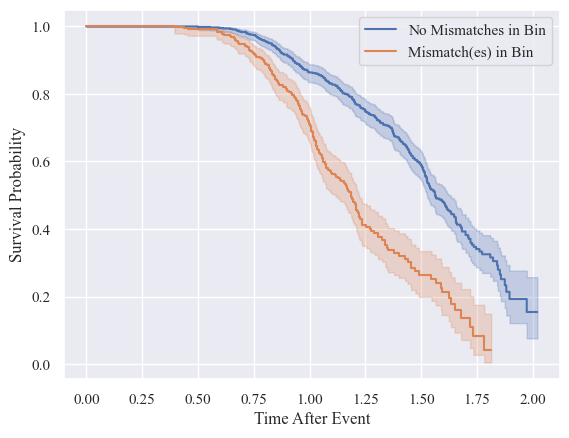

In [9]:
fibers.get_bin_survival_plot(show=True, save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              'evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + 'survival_plot.png')

#### Checking Top Rule Train Accuracy

In [10]:
print("Accuracy: ", fibers.score(data, true_risk_group))

Accuracy:  0.74


In [11]:
y = fibers.predict(data)
print(classification_report(y, true_risk_group))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       662
           1       0.58      0.86      0.69       338

    accuracy                           0.74      1000
   macro avg       0.74      0.77      0.73      1000
weighted avg       0.79      0.74      0.75      1000

